Welcome to the Image Classification Workshop!

The objective is to get a first hands-on with neural networs. It is also a good opportunity to acquire some Keras skills. Keras is a very widespread deep learning tool that is based on TensorFlow.

The task that you're given is to classify the test split of CIFAR10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html), after training a neural network with its train set.

You are given a toy network on which you can rely, and build a more optimized one. Bear in mind that there are some intentional mistakes in the code. You must also experiment with all the hyperparameters such as activation functions, loss function etc., as they are not the optimal ones. Let's begin!

First, we need to import some things:

keras is the DL library,

numpy is used for arrays,

PIL is used to handle images,

IPython.display is used in order to be able to show images on the notebook,

cv2 (openCV) is a computer vision library used for basic cv functions

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from PIL import Image
from IPython.display import display
import cv2

2023-08-30 13:30:55.777426: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


CIFAR10 is already included in Keras, so we just load it in two tuples, one for the train split, one for the test split. x indicates images and y labels (10 classes, so labels can be in the range 0,...,9)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("Training dataset images shape: " +str(x_train.shape))
print("Training dataset labels shape: " +str(y_train.shape))
print()
print("Test dataset images shape: " +str(x_test.shape))
print("Test dataset labels shape: " +str(y_test.shape))

Training dataset images shape: (50000, 32, 32, 3)
Training dataset labels shape: (50000, 1)

Test dataset images shape: (10000, 32, 32, 3)
Test dataset labels shape: (10000, 1)


Let's test that our dataset is successfully loaded and visualize some images.

CIFAR10 labels to classes:

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

Train image id: 1


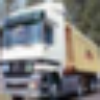

Label: 9, truck

Train image id: 23


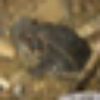

Label: 6, frog

Train image id: 43


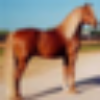

Label: 7, horse

Train image id: 6655


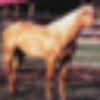

Label: 7, horse

Train image id: 8787


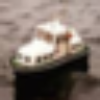

Label: 8, ship

Train image id: 544


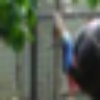

Label: 2, bird



In [3]:
from re import I
labels = ['airplane','automobile','bird','car','deer','dog','frog','horse','ship','truck']
test_images_ids = [1, 23, 43, 6655, 8787, 544]
for i in test_images_ids:
  test_image = x_train[i]
  test_image = cv2.resize(test_image, (100, 100))
  test_image = Image.fromarray(test_image)
  print("Train image id: " +str(i))
  display(test_image)
  #cv2.imshow(test_image)
  id = y_train[i][0]
  print(f"Label: {id}, {labels[id]}")
  print()

In [9]:
num_classes = 10
#convert to one hot vector!
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
for i in test_images_ids:
  print("Label of the first training example BEFORE one-hot encoding:" +str(y_train[i]))
  print("Label of the first training example AFTER one-hot encoding:" +str(y_train_onehot[i]))

Label of the first training example BEFORE one-hot encoding:[9]
Label of the first training example AFTER one-hot encoding:[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Label of the first training example BEFORE one-hot encoding:[6]
Label of the first training example AFTER one-hot encoding:[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Label of the first training example BEFORE one-hot encoding:[7]
Label of the first training example AFTER one-hot encoding:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Label of the first training example BEFORE one-hot encoding:[7]
Label of the first training example AFTER one-hot encoding:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Label of the first training example BEFORE one-hot encoding:[8]
Label of the first training example AFTER one-hot encoding:[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Label of the first training example BEFORE one-hot encoding:[2]
Label of the first training example AFTER one-hot encoding:[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In the following function we finally define our CNN model! It consists of a convolutional layer, a maxpooling one, another convolutional and a fully connected one (Dense). As Dense layers can only receive 1D inputs, we use Flatten() to unroll the 3D activation volume of the 2nd convolutional layer to a 1D vector.

- For activation function some common choises are: a) 'sigmoid', b) 'softmax', c) 'tanh', d) 'relu', etc.

- For loss function some common choises are: a) CategoricalCrossentropy(), b) MeanSquaredError(reduction='sum_over_batch_size'), etc.

- For optimizers some common choises are: a) Adam(), b) SGD(), RMSprop(), etc.

- You can also play with the number of filters in each layer starting from something like: 64-> 128 -> 256, if we are using 3 Conv2D layers.

In [5]:
def define_Model():

  #fill with random values
  initializer = keras.initializers.GlorotNormal()

  model = Sequential()

  #64 is the feature maps count (input data)
  #usually, 64, 128, 256 ("state-of-the-art" numbers)
  #relu - state-of-the-art for classification

  #kernels change during fit for each kernel!
  model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32, 32, 3), padding='same', kernel_initializer=initializer))
  model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer))
  # model.add(Dropout(0.3)) #improves calculation time - throws out non-significant inputs (?) (after Conv2D it helps!)
  # model.add(BatchNormalization())

  #dimensional reduction
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer))
  model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer))
  # model.add(Dropout(0.3))
  # model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer))
  model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer))
  # model.add(Dropout(0.3))
  # model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(100, activation='relu', kernel_initializer=initializer))
  model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

  model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

  return model

In [6]:
model_3 = define_Model()
model_3.summary()

/usr/local/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                   

The below functions can be used in order to apply some standard normilisation preprocessing and augmentation techniques.

In [7]:
def preprocess(x, y):
  '''print(x_train[0,10,10])


  red_mean = np.mean(x_train[:,:,:,0])
  green_mean = np.mean(x_train[:,:,:,1])
  blue_mean = np.mean(x_train[:,:,:,2])

  x_train[:,:,:,0] = x_train[:,:,:,0] - red_mean
  x_train[:,:,:,1] = x_train[:,:,:,1] - green_mean
  x_train[:,:,:,2] = x_train[:,:,:,2] - blue_mean'''

  x = x.astype('float64')

  x = x/255

  return x, y

def augmentation(x_train, y_train):

  x_train_augmented = x_train
  x_train2 = x_train[:,:,::-1]

  y_train = np.append(y_train, y_train, axis=0)
  

  x_train = np.append(x_train_augmented, x_train2, axis=0)

  return x_train, y_train

In [8]:
epochs = 5     # Number of epochs hyperperameter (how many times the whole dataset will be seen by the network). This parameter can be tweaked.
batch_size = 32 # Number of samples in each batch hyperperameter. This parameter can be tweaked.

# x_train, y_train = preprocess(x_train, y_train) # This line can be uncommented in order to apply some normilisation to the training data.
# x_test, y_test = preprocess(x_test, y_test)     # This line can be uncommented in order to apply some normilisation to the test data.

# x_train, y_train = augmentation(x_train, y_train)

history_3 = model_3.fit(x_train, y_train_onehot, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test_onehot)) # fit() starts the backpropagation algorithm.

Epoch 1/5
162/782 [=====>........................] - ETA: 12:25 - loss: 2.3520 - accuracy: 0.2734

KeyboardInterrupt: 

Thankn you for attending our workshop. For any questions/clarifications/comments please contact at ioannavalsamara@csd.auth.gr

In [ ]:
_, acc_1 = model_3.evaluate(x_test, y_test_onehot, verbose=0)

In [ ]:
acc_1

0.6769000291824341

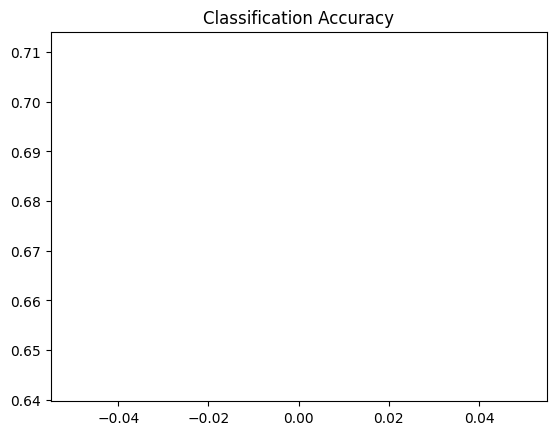

In [ ]:
from matplotlib import pyplot

pyplot.title('Classification Accuracy')
# pyplot.plot(history_1.history['accuracy'], color='blue', label='train')
# pyplot.plot(history_1.history['val_accuracy'], color='orange', label='test')
# pyplot.plot(history_2.history['val_accuracy'], color='blue', label='test')
pyplot.plot(history_3.history['val_accuracy'], color='red', label='test')